**GAME OF THRONES** <br>
**SEASON 7**




#**Team Members**
>PES1UG19CS011 - ABHAY DA<br>
PES1UG19CS042 - AKASH S<br>
PES1UG19CS404 - S S PRIYA<br>
PES1UG19CS440 - SEJAL MAURYA

# 1.Displaying Graph

Load the dataset from the CSVs into NetworkX to create an undirected graph.

## Import and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict
import networkx as nx
import community

In [2]:
edges = pd.read_csv("got-s7-edges.csv")
edges.head()

,Source,Target,Weight,Season
0,DAENERYS,TYRION,179,7
1,DAENERYS,JON,178,7
2,CERSEI,JAIME,172,7
3,ARYA,SANSA,156,7
4,JON,TYRION,107,7


In [3]:
nodes = pd.read_csv("got-s7-nodes.csv")
nodes.head()

,Id,Label
0,AEGON,Aegon
1,AERYS,Aerys
2,ALYS,Alys
3,ARYA,Arya
4,BALERION,Balerion


In [4]:
def make_graph(nodes_df, edges_df):

    G = nx.Graph()

    for i,row in nodes.iterrows():
        keys = row.index.tolist()
        values = row.values
        # The dict contains all attributes
        G.add_node(row['Id'], **dict(zip(keys,values)))

    for i,row in edges.iterrows():
        keys = row.index.tolist()
        values = row.values
        print(keys, values)
        G.add_edge(row['Source'], row['Target'], weight= row[''], **dict(zip(keys,values)))

    return G

In [5]:
G = nx.from_pandas_edgelist(edges, 'Source', 'Target', ['Weight'])

In [6]:
print(G)

Graph with 81 nodes and 412 edges


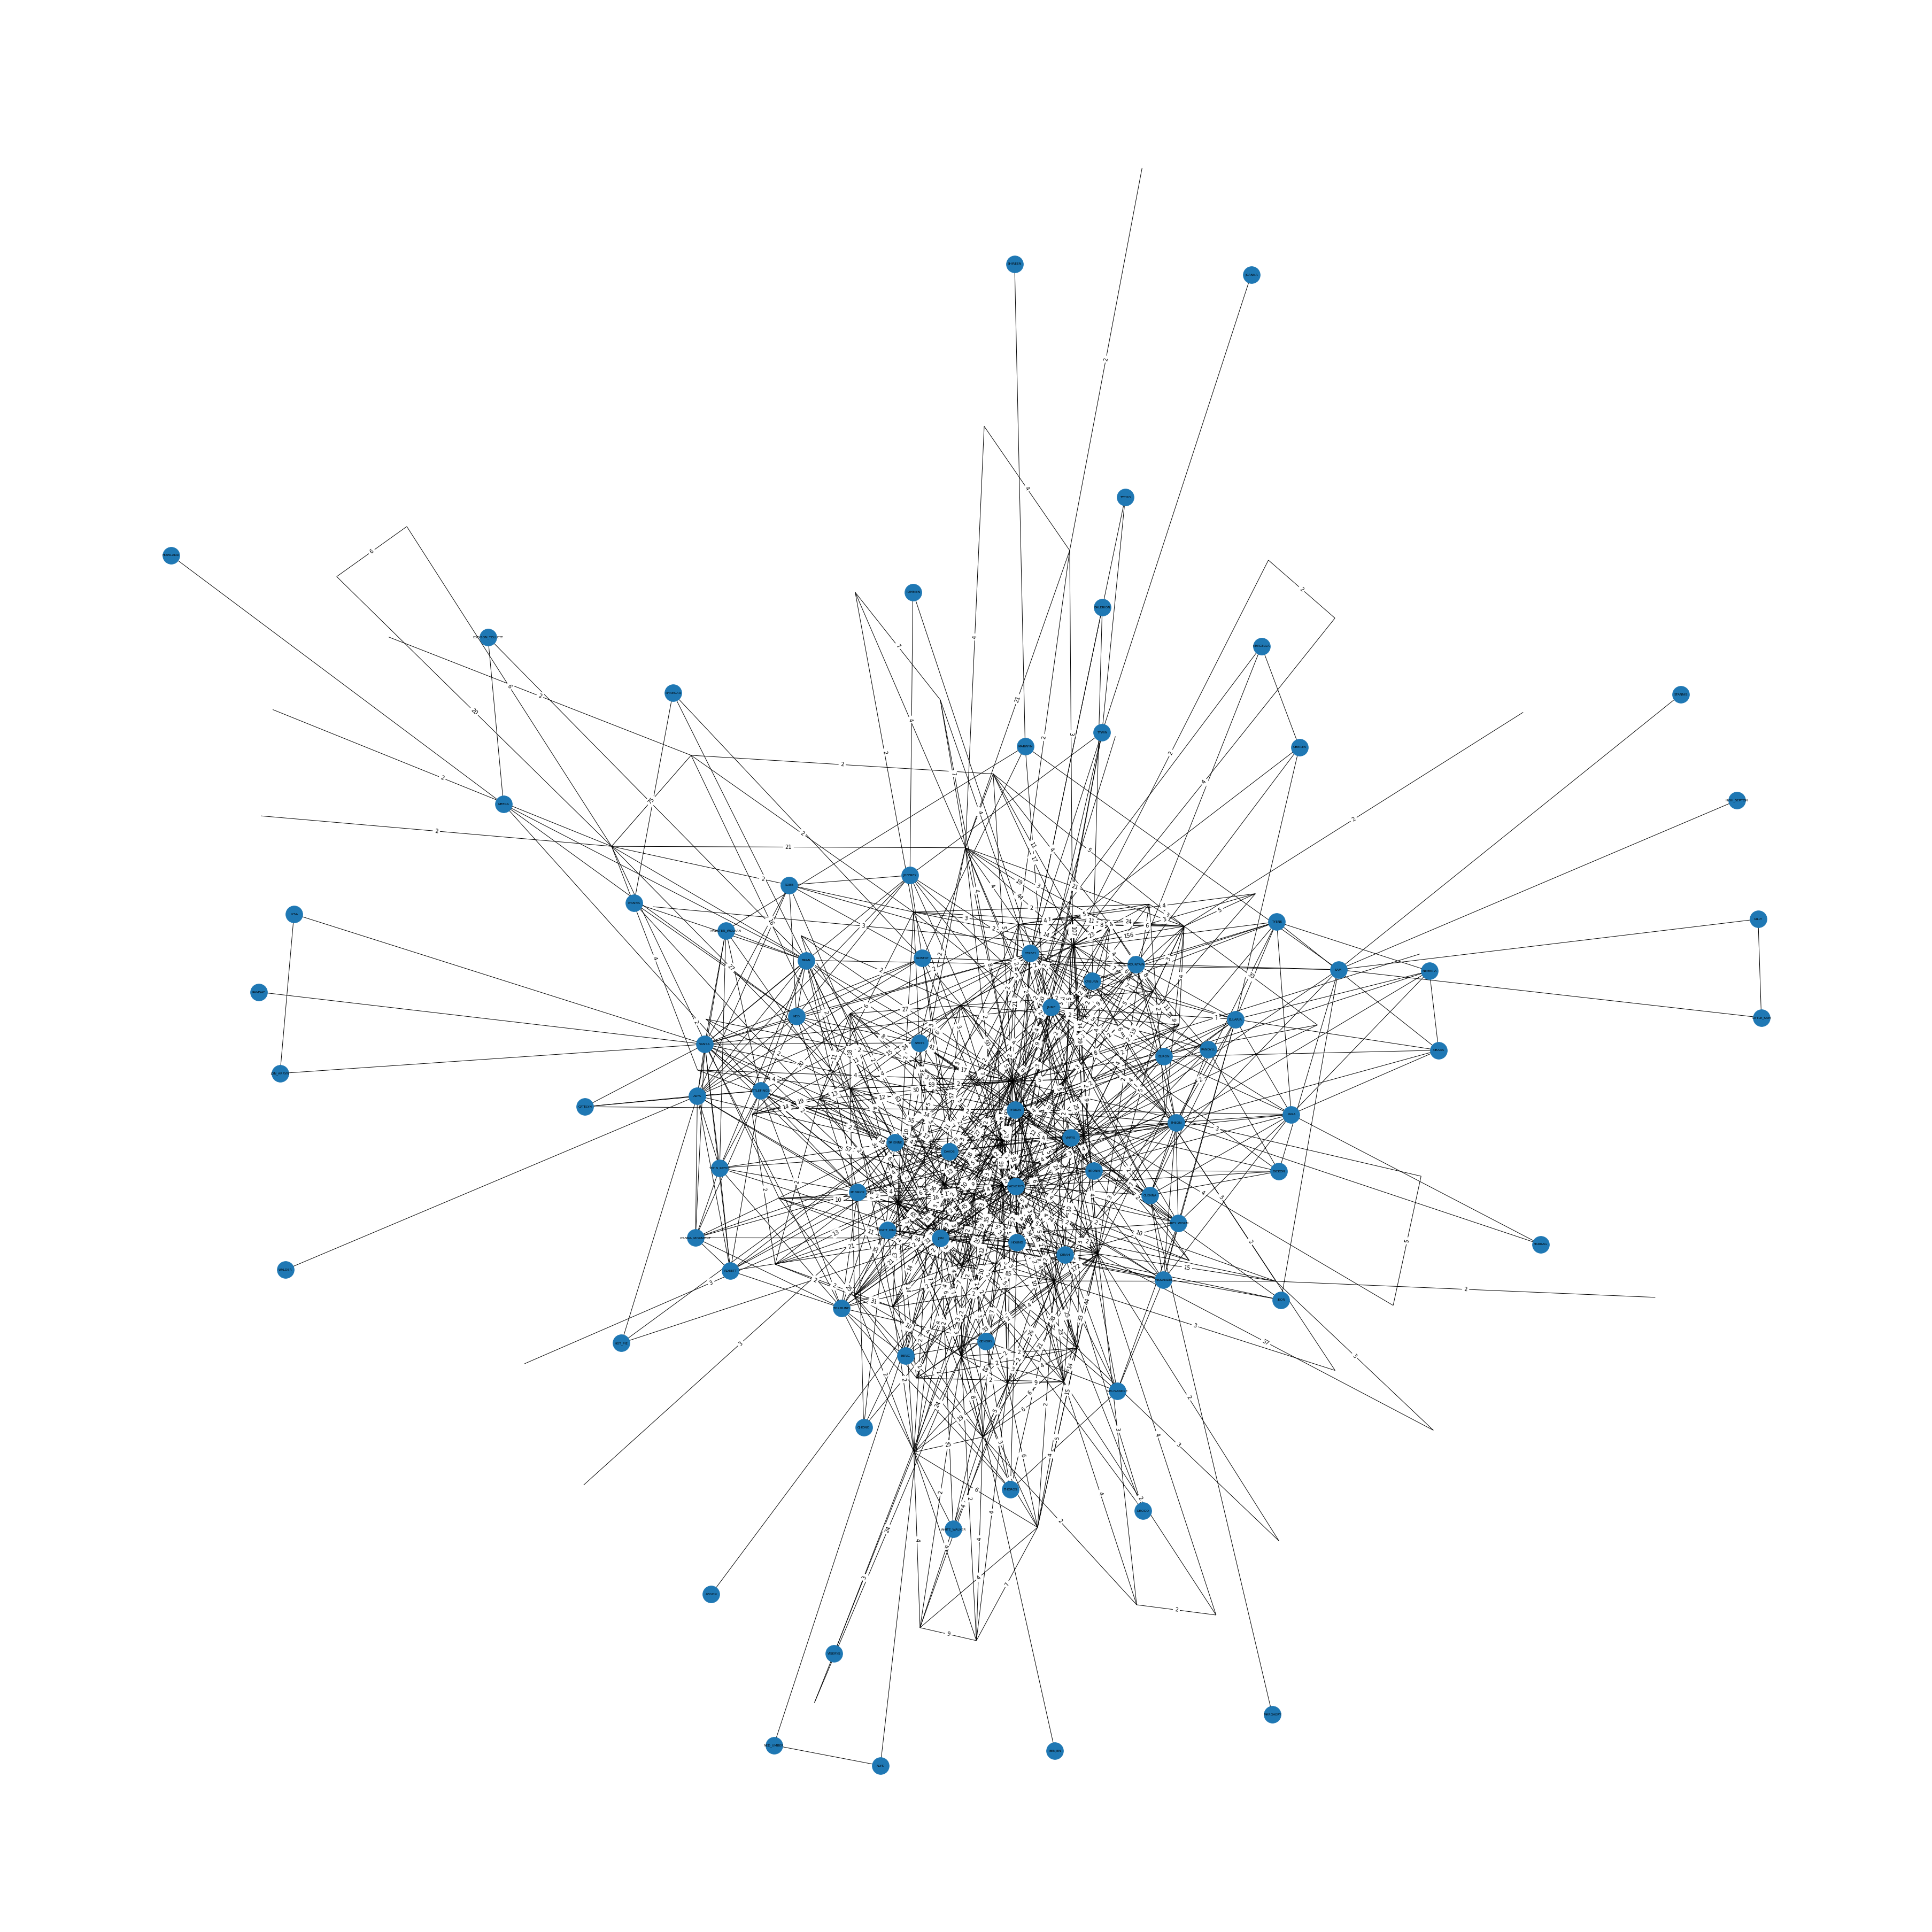

In [7]:
plt.figure(figsize=(50,50))
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, with_labels=True, node_size = 1000, font_size=6 )
nx.draw_networkx_edges(G, pos=pos)
labels = nx.get_edge_attributes(G,'Weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# 2.Exploratory Data Analysis

a. Check for isolates, self-loops, etc <br>
b. other EDA

In [8]:
s='\n The graph details: '
print (s)


a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
######################################################################
#      DETAILS ABOUT THE GRAPH 
#######################################################################

a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
######################################################################
#      DETAILS ABOUT THE GRAPH 
#######################################################################

a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)

deg=nx.degree(G)
a= min(deg)
s='\n The min degree: ' +repr(a)
print (s)

a = max(deg)
s='\n The max degree: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)

######################################################################
#      B. CHECKING FOR LOOPS
#######################################################################

#checking for isolates

a = list(nx.isolates(G))
s='\n The isolates: ' +repr(a)
print(s)

#checking for self loop
a = list(nx.selfloop_edges(G))
s='\n The self loops: ' +repr(a)
print(s)


 The graph details: 

 The no of nodes: 81

 The no of edges: 412

 The min degree: ('AEGON', 1)

 The max degree: ('YOHN_ROYCE', 12)

 The no of edges: 412

 The isolates: []

 The self loops: []


#

# 3.Calculate the following measures:
* Betweenness
* PageRank
* Local clustering coefficient

## Betweenness

In [9]:
from operator import itemgetter

bet = nx.betweenness_centrality(G)

nx.set_node_attributes(G, bet, "betweenness")  

sorted(bet.items(), key=itemgetter(1), reverse=True)

[('JON', 0.237362397781175),
 ('DAENERYS', 0.1151517019513258),
 ('CERSEI', 0.11205674388253951),
 ('SAM', 0.10441836533706125),
 ('SANSA', 0.09108866886217314),
 ('TYRION', 0.08310372822923297),
 ('BRAN', 0.06815847971192848),
 ('JORAH', 0.0495849896207265),
 ('THEON', 0.04835906640452009),
 ('ARYA', 0.03888085859226906),
 ('JAIME', 0.037114084296424016),
 ('ROBERT', 0.03326920656369111),
 ('OLENNA', 0.029254348152048026),
 ('BRIENNE', 0.027659172125690582),
 ('TYWIN', 0.027517430387545967),
 ('NED', 0.026368288119300073),
 ('MEERA', 0.02609008450501377),
 ('MARWYN', 0.025906616086170297),
 ('DAVOS', 0.02500360792483971),
 ('LITTLEFINGER', 0.024830727302128805),
 ('HOUND', 0.01866808585656822),
 ('MOUNTAIN', 0.01582798334366356),
 ('EURON', 0.015368710085752196),
 ('JOFFREY', 0.015258026933955605),
 ('ELLARIA', 0.01213099182206159),
 ('YARA', 0.011895479392427443),
 ('PODRICK', 0.011260252977565582),
 ('QYBURN', 0.010232112923683983),
 ('VARYS', 0.010082240645144201),
 ('DICKON', 0.00

## Pagerank

In [10]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)

nx.set_node_attributes(G, pgr, "pagerank")

print (sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:

[('JON', 0.04881727542311829), ('DAENERYS', 0.03748660561390363), ('TYRION', 0.035123365523226154), ('CERSEI', 0.033693769749151316), ('SANSA', 0.029421494591443925), ('DAVOS', 0.026895997021399144), ('BRIENNE', 0.024796202068082654), ('THEON', 0.024558050235901952), ('JORAH', 0.024398651725411093), ('JAIME', 0.023449580780635974), ('HOUND', 0.023338474907406547), ('ARYA', 0.02194378282295219), ('BRAN', 0.021710018058349972), ('SAM', 0.021081058296214514), ('VARYS', 0.0194070719249683), ('LITTLEFINGER', 0.01933234951526175), ('PODRICK', 0.018899836636979857), ('OLENNA', 0.018270647280475415), ('TORMUND', 0.018114092675072194), ('ELLARIA', 0.01798008879972857), ('NED', 0.01795533239544228), ('MOUNTAIN', 0.017218083100444606), ('EURON', 0.01664997656360307), ('BRONN', 0.01654650221066814), ('QYBURN', 0.01610712658358272), ('ROBERT', 0.015506583649818238), ('YARA', 0.015487702770000996), ('GREY_WORM', 0.014632882418283765), ('JOFFREY', 0.013780288487277657), ('MISSANDE

## Local Clustering Coefficient

In [11]:
#local clustering coefficient
lcc = nx.clustering(G)

nx.set_node_attributes(G, lcc, "clusteringcoeff")

print (sorted(lcc.items(), key=itemgetter(1), reverse=True))

[('TYCHO', 1.0), ('HOT_PIE', 1.0), ('HARRAG', 1.0), ('GILLY', 1.0), ('NYMERIA', 1.0), ('OBARA', 1.0), ('LITTLE_SAM', 1.0), ('ALYS', 1.0), ('NED_UMBER', 1.0), ('EDDISON_TOLLETT', 1.0), ('MYRCELLA', 1.0), ('LYSA', 1.0), ('BALERION', 1.0), ('TOMMEN', 1.0), ('QHONO', 1.0), ('DROGO', 1.0), ('WHITE_WALKER', 1.0), ('JON_ARRYN', 1.0), ('LYANNA_MORMONT', 0.9555555555555556), ('ROBETT', 0.9555555555555556), ('ROBB', 0.8571428571428571), ('JEOR', 0.8333333333333334), ('OBERYN', 0.8333333333333334), ('YOHN_ROYCE', 0.8181818181818182), ('THOROS', 0.8095238095238095), ('RANDYLL', 0.8055555555555556), ('AERYS', 0.7857142857142857), ('BERIC', 0.7555555555555555), ('TYENE', 0.7555555555555555), ('NIGHT_KING', 0.7555555555555555), ('MISSANDEI', 0.7435897435897436), ('GREY_WORM', 0.7362637362637363), ('DICKON', 0.7142857142857143), ('MELISANDRE', 0.7142857142857143), ('MAESTER_WOLKAN', 0.7142857142857143), ('BRONN', 0.7), ('QYBURN', 0.6952380952380952), ('EURON', 0.6833333333333333), ('GENDRY', 0.6727272

In [12]:
print(G.nodes["TYCHO"]["betweenness"])
print(G.nodes["TYCHO"]["pagerank"])
print(G.nodes["TYCHO"]["clusteringcoeff"])

0.0
0.004113921196149611
1.0


In [13]:
for node in G.nodes():
  print( node, G.nodes[node] )

DAENERYS {'betweenness': 0.1151517019513258, 'pagerank': 0.03748660561390363, 'clusteringcoeff': 0.3226381461675579}
TYRION {'betweenness': 0.08310372822923297, 'pagerank': 0.035123365523226154, 'clusteringcoeff': 0.35294117647058826}
JON {'betweenness': 0.237362397781175, 'pagerank': 0.04881727542311829, 'clusteringcoeff': 0.2547065337763012}
CERSEI {'betweenness': 0.11205674388253951, 'pagerank': 0.033693769749151316, 'clusteringcoeff': 0.3419354838709677}
JAIME {'betweenness': 0.037114084296424016, 'pagerank': 0.023449580780635974, 'clusteringcoeff': 0.49783549783549785}
ARYA {'betweenness': 0.03888085859226906, 'pagerank': 0.02194378282295219, 'clusteringcoeff': 0.41830065359477125}
SANSA {'betweenness': 0.09108866886217314, 'pagerank': 0.029421494591443925, 'clusteringcoeff': 0.358695652173913}
LITTLEFINGER {'betweenness': 0.024830727302128805, 'pagerank': 0.01933234951526175, 'clusteringcoeff': 0.5441176470588235}
DAVOS {'betweenness': 0.02500360792483971, 'pagerank': 0.026895997

# 4.Spectral Clustering

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import matplotlib.patches as mpatches
import random
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from itertools import count 

In [15]:
# Class to perform spectral clustering for k clusters, given k

class SpectralClustering:
    
    def __init__(self, G):
        # Initialize the graph, nodes and the normalized Laplacian

        self.graph = G
        self.normalized_laplacian = nx.linalg.normalized_laplacian_matrix(G).toarray()
        self.nodes = G.nodes()

    def compute_eigenspace(self):
        # Compute the eigenvalues and the eigenvectors using Numpy and sort them in ascending order 

        eigenvalues, eigenvectors = np.linalg.eig(self.normalized_laplacian)

        sort_index = np.argsort(eigenvalues) # Returns the list of indices that would sort the array
        sorted_eigenvectors = eigenvectors[:, sort_index]

        return sorted_eigenvectors

    def fit(self, k):
        """
        Step 1: Extract the k eigen vectors and stack them vertically to form a matrix (i.e each vector is a column)
        Step 2: Every row of this matrix represents the features of the respective nodes of the graph
        Step 3: Perform K-Means clustering on this dataset to identify k clusters

        """
        eigenvectors = self.compute_eigenspace()
        k_eigenvectors = np.array(eigenvectors)[:,:k]
        dataset = pd.DataFrame(k_eigenvectors, index=self.nodes)

        # print(dataset)

        k_means_clusters = KMeans(n_clusters = k, random_state=42)
        self.clusters = k_means_clusters.fit(k_eigenvectors)
        
    def predict_labels(self):
        # Returns the labels 
        return self.clusters.labels_

    def assign_labels(self, labels):
        # Helper to assign the labels as node attributes
        for i,node in enumerate(self.graph.nodes()):
            self.graph.nodes[node]['label'] = labels[i]

    def plot_graph(self, n_clusters, title='Graph after Spectral Clustering'):
        # Plots the graph 

        labels = self.clusters.labels_
        self.assign_labels(labels)

        colour_list = ['blue','green','red','yellow','cyan', 'magenta','lightblue','grey']
        sampled_colours = dict(zip(set(labels),random.sample(colour_list, n_clusters)))

        legend_handles = []
        for label, color in sampled_colours.items():
            colour_handle = mpatches.Patch(color=color, label=label)
            legend_handles.append(colour_handle)

        colours = [sampled_colours[i] for i in labels]

        pos_fr = nx.fruchterman_reingold_layout(self.graph)
        plt.figure(figsize=(8,8))
        plt.title(title)
        plt.legend(handles=legend_handles)
        nx.draw(self.graph, pos=pos_fr, node_size=500, node_color=colours, with_labels=True)
        plt.show()

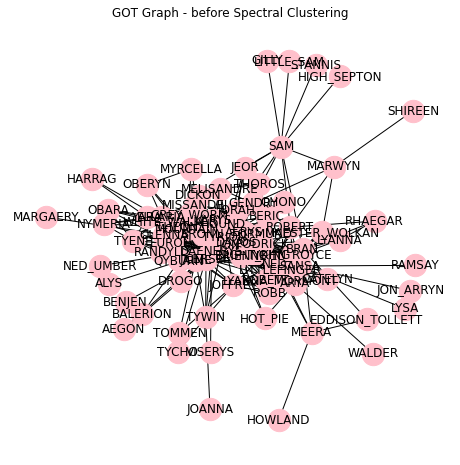

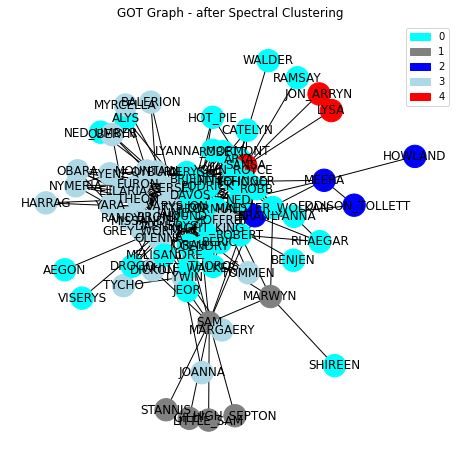

In [16]:
title = "GOT Graph - before Spectral Clustering"

pos_fr = nx.fruchterman_reingold_layout(G)

plt.figure(figsize=(8,8))
plt.title(title)
nx.draw(G, pos=pos_fr, node_size=500, node_color='pink', with_labels=True)
plt.show()
print()

# Clustering the GOT Graph using Spectral Clustering
k = 5 # Just a sample value
SC = SpectralClustering(G)
SC.fit(k)
labels = SC.predict_labels()

for i,node in enumerate(G.nodes()):
    G.nodes[node]['label'] = labels[i]

SC.plot_graph(k, title="GOT Graph - after Spectral Clustering")

In the dataset provided for season 7, we can get to know from the GOT graph before clustering all of the characters who assemble for the great battle and also other clans fighting against each other. In the GOT graph of after spectral clustering we see that the clusters are based on the fact how they are related like belonging to the same clan, family ties and also based on small groups who are always together.

In [17]:
communities = {}
for node in G.nodes():
  if G.nodes[node]['label'] not in communities.keys():
    communities[G.nodes[node]['label']] = []
  else:
    communities[G.nodes[node]['label']].append(node)
  
from pprint import pprint
pprint(communities)

{0: ['ARYA',
     'LITTLEFINGER',
     'DAVOS',
     'BERIC',
     'HOUND',
     'JORAH',
     'THOROS',
     'TORMUND',
     'GENDRY',
     'HOT_PIE',
     'BRIENNE',
     'PODRICK',
     'YOHN_ROYCE',
     'NED',
     'MELISANDRE',
     'NIGHT_KING',
     'MAESTER_WOLKAN',
     'AERYS',
     'LYANNA_MORMONT',
     'ROBETT',
     'BENJEN',
     'LYANNA',
     'RHAEGAR',
     'ROBERT',
     'ALYS',
     'NED_UMBER',
     'CATELYN',
     'ROBB',
     'JEOR',
     'AEGON',
     'VISERYS',
     'RAMSAY',
     'WALDER',
     'QHONO',
     'DROGO',
     'WHITE_WALKER',
     'SHIREEN'],
 1: ['SAM', 'GILLY', 'LITTLE_SAM', 'HIGH_SEPTON', 'STANNIS'],
 2: ['MEERA', 'EDDISON_TOLLETT', 'HOWLAND'],
 3: ['TYRION',
     'CERSEI',
     'JAIME',
     'BRONN',
     'VARYS',
     'QYBURN',
     'EURON',
     'TYCHO',
     'OLENNA',
     'MISSANDEI',
     'THEON',
     'MOUNTAIN',
     'RANDYLL',
     'GREY_WORM',
     'DICKON',
     'ELLARIA',
     'YARA',
     'HARRAG',
     'TYENE',
     'TYWIN',
     

Based on the communities formed above we can infer how each character interacts or know each other based on the interactions formed between them. Each community also tells us about the blood ties between them or the battle they waged against each other. The communities also try to tell us how closely each character is also related to each other. 

Community 0 - 
Tells us about the kingdoms in the north headed by the Stark clan and their allies. The Stark and Targaeryan Kingdoms have joined forces and the community mainly consists of characters belonging to either of those families. They also contain some of the prominent soliders or men who are friends of the main characters. Since the North is battling the main antagonists in Season 7, the White Walkers and Night King are also members of this community.

Community 1 - 
This community informs us about the family of Sam who are in a separate location from the main action and do not interact much with other protagonists. Stannis has only one edge to Sam since he is mentioned once by Sam. This could be a reason for his being in the community.

Community 2  -
Community 2 is made up of characters who have little interaction with the other protagonists and primarily have ties to each other. Meera Reed and her father make up the majority of the group. Edison Tollet has only one interaction this season, which is with Meera Reed and Bran Stark.

Community 3 -
Informs about the Lannister kingdom and characters allegiant to them. We get to know the various kings and their advisors along with some of their important soldiers or men being mentioned along with them. We also get to know about the Greyjoy kingdom, who are allies. In addition, the community has characters who battle the Lannisters in Season 7, such as the Tyrell Kingdom.

Community 4 -
Consists of only the husband and wife who belong to the arryn clan and are already deceased. They are mentioned in passing by Sansa Stark. Therefore, other than edges to each other, they only have an edge to Sansa with a low weight.

# 5.Link Prediction using Traditional Methods

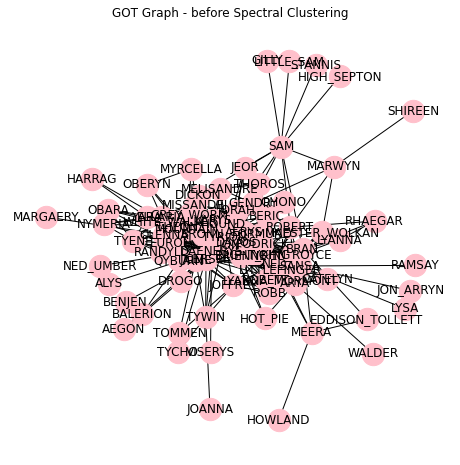

In [18]:
plt.figure(figsize=(8,8))
plt.title(title)
nx.draw(G, pos=pos_fr, node_size=500, node_color='pink', with_labels=True)
plt.show()
print()

In [19]:
# take a random sample of edges

proportion_edges = 0.25
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# remove some edges. the goal is to try and repredict these edges, and measure how close the prediction is to the original.

G_train = G.copy()
G_train.remove_edges_from(edge_subset)

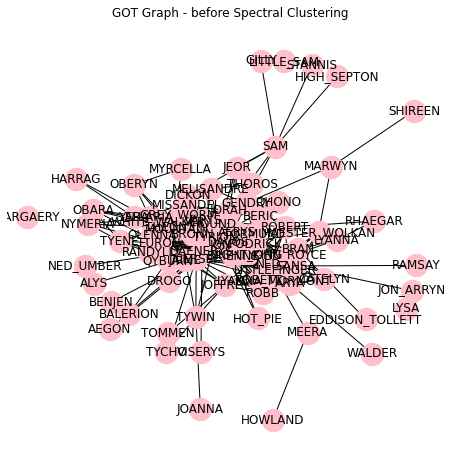

In [20]:
plt.figure(figsize=(8,8))
plt.title(title)
nx.draw(G_train, pos=pos_fr, node_size=500, node_color='pink', with_labels=True)
plt.show()
print()

In [21]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(G.number_of_edges() - edge_subset_size))

# just printing the edge_subset.
print('Edge subset:')
print(edge_subset)

Deleted edges = 103
Remaining edges = 309
Edge subset:
[('ELLARIA', 'YARA'), ('ARYA', 'HOT_PIE'), ('TYRION', 'GENDRY'), ('MISSANDEI', 'ELLARIA'), ('JAIME', 'OLENNA'), ('CERSEI', 'QYBURN'), ('JON', 'TORMUND'), ('DAVOS', 'LYANNA_MORMONT'), ('TORMUND', 'PODRICK'), ('CERSEI', 'BRONN'), ('JAIME', 'TOMMEN'), ('ARYA', 'LITTLEFINGER'), ('MISSANDEI', 'GREY_WORM'), ('DAENERYS', 'TYWIN'), ('THEON', 'PODRICK'), ('SANSA', 'LYSA'), ('DAENERYS', 'ELLARIA'), ('JAIME', 'GREY_WORM'), ('BERIC', 'GENDRY'), ('LITTLEFINGER', 'NED'), ('CERSEI', 'BRIENNE'), ('LITTLEFINGER', 'BRIENNE'), ('VARYS', 'HOUND'), ('BRAN', 'NIGHT_KING'), ('SANSA', 'ROBERT'), ('JON', 'THEON'), ('JON', 'VARYS'), ('YARA', 'TYENE'), ('TYRION', 'JOFFREY'), ('MARWYN', 'ROBERT'), ('HOUND', 'QYBURN'), ('ARYA', 'PODRICK'), ('DAENERYS', 'RANDYLL'), ('TORMUND', 'LYANNA_MORMONT'), ('ELLARIA', 'TYENE'), ('SANSA', 'ROBB'), ('OLENNA', 'AERYS'), ('GREY_WORM', 'ELLARIA'), ('DAENERYS', 'DROGO'), ('JORAH', 'THEON'), ('JAIME', 'QYBURN'), ('LITTLEFINGER',

## Jaccard coefficient


In [22]:
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
# calculating jaccard coefficient for all the node pairs in G_karate_train.

prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [24]:
# binary classification here. taking various thresholds for the jaccard coefficient.
# calculating fpr, tpr, and auc values for various thresholds of the jaccard coefficient.

fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

##Adamic-Adar similarity

In [25]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [26]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

##Preferential attachment measure

In [27]:
prediction_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [28]:
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

##Plotting ROC AUC curve

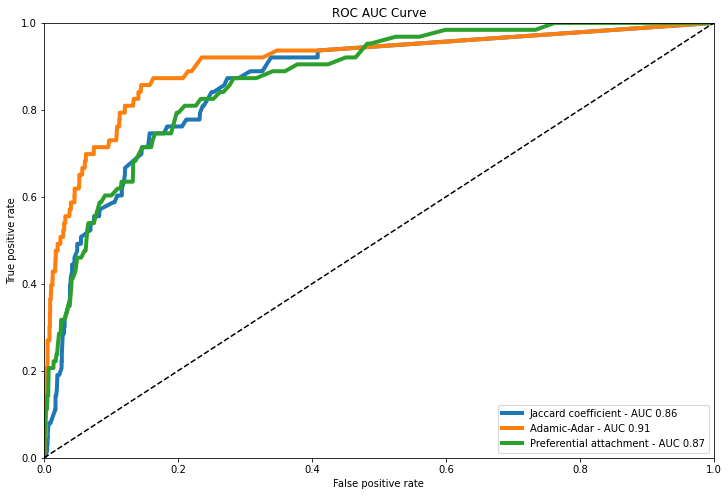

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

In [30]:
# however, in this particular case, it is clear from the auc, that Adamic-Adar performs the best.
# now, find the threshold value at which adamic adar performs the best.
optimal_idx = np.argmax(tpr_adamic - fpr_adamic)
optimal_threshold = thresholds_adamic[optimal_idx]
print("Optimal threshold =", optimal_threshold)

# this is the threshold value above which a link will be classified as existant, and below which a link will be classified as non-existant.

Optimal threshold = 0.6810779214712426


# 6.Link Prediction using GraphML

In [31]:
# Install required packages.
'''!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git'''


'!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html\n!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html\n!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git'

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install torch-cluster

1.11.0+cu113
     |████████████████████████████████| 7.9 MB 5.0 MB/s 
     |████████████████████████████████| 3.5 MB 4.8 MB/s 
     |████████████████████████████████| 43 kB 989 kB/s 
  Created wheel for torch-cluster: filename=torch_cluster-1.6.0-cp37-cp37m-linux_x86_64.whl size=309643 sha256=9065bf558dfd5760b61b3d10e8344c8162ad3d3a0ea0aac5674d3be692f0387b
  Stored in directory: /root/.cache/pip/wheels/bc/c7/3e/258dd72b35d7a459264143ad5bfe97b9dc5eef90069ca2f13f
Successfully built torch-cluster


In [ ]:
import torch
from sklearn.metrics import roc_auc_score

import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling
from torch_geometric.nn import GATConv, SAGEConv
from torch_geometric.utils import convert

from sklearn.preprocessing import StandardScaler

In [ ]:
nodes['s'] = pd.factorize(nodes['Id'])[0]
tag = dict(zip(nodes.Id, nodes.s))
print(tag)

{'AEGON': 0, 'AERYS': 1, 'ALYS': 2, 'ARYA': 3, 'BALERION': 4, 'BENJEN': 5, 'BERIC': 6, 'BRAN': 7, 'BRIENNE': 8, 'BRONN': 9, 'CATELYN': 10, 'CERSEI': 11, 'DAENERYS': 12, 'DAVOS': 13, 'DICKON': 14, 'EDDISON_TOLLETT': 15, 'DROGO': 16, 'ELLARIA': 17, 'EURON': 18, 'GENDRY': 19, 'GILLY': 20, 'GREY_WORM': 21, 'HARRAG': 22, 'HIGH_SEPTON': 23, 'HOT_PIE': 24, 'HOUND': 25, 'HOWLAND': 26, 'JAIME': 27, 'JEOR': 28, 'JOANNA': 29, 'JOFFREY': 30, 'JON': 31, 'JON_ARRYN': 32, 'JORAH': 33, 'LITTLE_SAM': 34, 'LITTLEFINGER': 35, 'LYANNA': 36, 'LYANNA_MORMONT': 37, 'LYSA': 38, 'MARGAERY': 39, 'MARWYN': 40, 'MEERA': 41, 'MELISANDRE': 42, 'MISSANDEI': 43, 'MOUNTAIN': 44, 'MYRCELLA': 45, 'NED': 46, 'NED_UMBER': 47, 'NIGHT_KING': 48, 'NYMERIA': 49, 'OBARA': 50, 'OBERYN': 51, 'OLENNA': 52, 'PODRICK': 53, 'QHONO': 54, 'QYBURN': 55, 'RAMSAY': 56, 'RANDYLL': 57, 'RHAEGAR': 58, 'ROBB': 59, 'ROBERT': 60, 'ROBETT': 61, 'SAM': 62, 'SANSA': 63, 'SHIREEN': 64, 'STANNIS': 65, 'THEON': 66, 'THOROS': 67, 'TOMMEN': 68, 'TORMU

In [ ]:
edges["Source"] = edges['Source'].map(tag)
edges["Target"] = edges['Target'].map(tag)
edges = edges[['Source', 'Target', 'Weight']]
edges.head()

,Source,Target,Weight
0,12,72,179
1,12,31,178
2,11,27,172
3,3,63,156
4,31,72,107


In [ ]:
G_edge = nx.Graph()
# Iterating through the DataFrame to add edges
for _, edge in edges.iterrows():
    G_edge.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])

In [ ]:
pyg = convert.from_networkx(G_edge)
pyg

Data(edge_index=[2, 824], weight=[824], num_nodes=81)

In [ ]:
embeddings = np.array(list(dict(G_edge.degree()).values()))

In [ ]:
# normalizing degree values
scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))
pyg.x = torch.from_numpy(embeddings).type(torch.float32)
pyg

Data(edge_index=[2, 824], weight=[824], num_nodes=81, x=[81, 1])

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
    T.NormalizeFeatures(),
    T.ToDevice(device),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True,
                      add_negative_train_samples=False),
])

In [ ]:
dataset = pyg
dataset = dataset.to(device)
transform = T.RandomLinkSplit(is_undirected=True)
train_data, val_data, test_data = transform(dataset)

## GCN

In [ ]:
class GCNNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()


In [ ]:
GCNmodel = GCNNet(dataset.num_features, 128, 64).to(device)

In [ ]:
optimizer = torch.optim.Adam(params=GCNmodel.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

In [ ]:
def train():
    GCNmodel.train()
    optimizer.zero_grad()
    z = GCNmodel.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = GCNmodel.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss

In [ ]:
@torch.no_grad()
def test(data):
    GCNmodel.eval()
    z = GCNmodel.encode(data.x, data.edge_index)
    out = GCNmodel.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

In [ ]:
best_val_auc = final_test_auc = 0
for epoch in range(1, 101):
    loss = train()
    val_auc = test(val_data)
    test_auc = test(test_data)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test (GCN Model): {final_test_auc:.4f}')

Epoch: 001, Loss: 0.6894, Val: 0.8810, Test: 0.7457
Epoch: 002, Loss: 0.6707, Val: 0.8620, Test: 0.7469
Epoch: 003, Loss: 0.6587, Val: 0.8406, Test: 0.7421
Epoch: 004, Loss: 0.6494, Val: 0.8525, Test: 0.7457
Epoch: 005, Loss: 0.6758, Val: 0.8435, Test: 0.7458
Epoch: 006, Loss: 0.6480, Val: 0.8376, Test: 0.7426
Epoch: 007, Loss: 0.6472, Val: 0.8418, Test: 0.7458
Epoch: 008, Loss: 0.6522, Val: 0.8495, Test: 0.7454
Epoch: 009, Loss: 0.6473, Val: 0.8525, Test: 0.7460
Epoch: 010, Loss: 0.6520, Val: 0.8501, Test: 0.7479
Epoch: 011, Loss: 0.6481, Val: 0.8447, Test: 0.7455
Epoch: 012, Loss: 0.6533, Val: 0.8370, Test: 0.7412
Epoch: 013, Loss: 0.6514, Val: 0.8328, Test: 0.7385
Epoch: 014, Loss: 0.6578, Val: 0.8299, Test: 0.7385
Epoch: 015, Loss: 0.6455, Val: 0.8311, Test: 0.7391
Epoch: 016, Loss: 0.6481, Val: 0.8352, Test: 0.7394
Epoch: 017, Loss: 0.6374, Val: 0.8370, Test: 0.7414
Epoch: 018, Loss: 0.6376, Val: 0.8269, Test: 0.7377
Epoch: 019, Loss: 0.6392, Val: 0.8120, Test: 0.7319
Epoch: 020, 

## GraphSAGE

In [ ]:
class SAGENet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()

In [ ]:
SAGEmodel = SAGENet(dataset.num_features, 128, 64).to(device)

In [ ]:
optimizer = torch.optim.Adam(params=SAGEmodel.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

In [ ]:
def SAGEtrain():
    SAGEmodel.train()
    optimizer.zero_grad()
    z = SAGEmodel.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = SAGEmodel.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss

In [ ]:
@torch.no_grad()
def SAGEtest(data):
    SAGEmodel.eval()
    z = SAGEmodel.encode(data.x, data.edge_index)
    out = SAGEmodel.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

In [ ]:
best_val_auc = final_test_auc = 0

for epoch in range(1, 101):
    loss = SAGEtrain()
    val_auc = SAGEtest(val_data)
    test_auc = SAGEtest(test_data)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test (GraphSAGE Model): {final_test_auc:.4f}')

Epoch: 001, Loss: 17.0383, Val: 0.5253, Test: 0.5059
Epoch: 002, Loss: 28.5816, Val: 0.6805, Test: 0.6665
Epoch: 003, Loss: 10.9428, Val: 0.6829, Test: 0.6798
Epoch: 004, Loss: 9.3588, Val: 0.5934, Test: 0.5942
Epoch: 005, Loss: 14.8251, Val: 0.6169, Test: 0.6301
Epoch: 006, Loss: 11.5886, Val: 0.6416, Test: 0.6640
Epoch: 007, Loss: 5.2285, Val: 0.6871, Test: 0.6767
Epoch: 008, Loss: 2.8495, Val: 0.7302, Test: 0.6880
Epoch: 009, Loss: 4.7732, Val: 0.7106, Test: 0.6877
Epoch: 010, Loss: 7.2332, Val: 0.7109, Test: 0.6881
Epoch: 011, Loss: 6.8279, Val: 0.7400, Test: 0.6898
Epoch: 012, Loss: 3.8785, Val: 0.7418, Test: 0.6858
Epoch: 013, Loss: 1.9158, Val: 0.7281, Test: 0.6877
Epoch: 014, Loss: 1.8018, Val: 0.7210, Test: 0.6884
Epoch: 015, Loss: 2.6051, Val: 0.7252, Test: 0.6979
Epoch: 016, Loss: 3.3183, Val: 0.7299, Test: 0.7037
Epoch: 017, Loss: 3.3798, Val: 0.7430, Test: 0.7088
Epoch: 018, Loss: 2.5240, Val: 0.7531, Test: 0.7191
Epoch: 019, Loss: 1.7583, Val: 0.7650, Test: 0.7179
Epoch: 

## GAT

In [ ]:
class GATNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()

In [ ]:
GATmodel = GATNet(dataset.num_features, 128, 64).to(device)

In [ ]:
optimizer = torch.optim.Adam(params=GATmodel.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

In [ ]:
def GATtrain():
    GATmodel.train()
    optimizer.zero_grad()
    z = GATmodel.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = GATmodel.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss

In [ ]:
@torch.no_grad()
def GATtest(data):
    GATmodel.eval()
    z = GATmodel.encode(data.x, data.edge_index)
    out = GATmodel.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())
    

In [ ]:
best_val_auc = final_test_auc = 0
gat_loss = []
for epoch in range(1, 101):
    loss = GATtrain()
    gat_loss.append(loss.detach().numpy())
    val_auc = GATtest(val_data)
    test_auc = GATtest(test_data)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test (GAT Model): {final_test_auc:.4f}')

Epoch: 001, Loss: 0.7612, Val: 0.8441, Test: 0.7246
Epoch: 002, Loss: 0.7000, Val: 0.8203, Test: 0.7405
Epoch: 003, Loss: 0.7039, Val: 0.8084, Test: 0.7421
Epoch: 004, Loss: 0.7049, Val: 0.8138, Test: 0.7429
Epoch: 005, Loss: 0.7008, Val: 0.8138, Test: 0.7414
Epoch: 006, Loss: 0.6943, Val: 0.8221, Test: 0.7415
Epoch: 007, Loss: 0.6873, Val: 0.8400, Test: 0.7377
Epoch: 008, Loss: 0.6796, Val: 0.8430, Test: 0.7350
Epoch: 009, Loss: 0.6785, Val: 0.8418, Test: 0.7359
Epoch: 010, Loss: 0.6756, Val: 0.8400, Test: 0.7351
Epoch: 011, Loss: 0.6726, Val: 0.8370, Test: 0.7403
Epoch: 012, Loss: 0.6675, Val: 0.8275, Test: 0.7446
Epoch: 013, Loss: 0.6683, Val: 0.8198, Test: 0.7403
Epoch: 014, Loss: 0.6681, Val: 0.8257, Test: 0.7394
Epoch: 015, Loss: 0.6770, Val: 0.8311, Test: 0.7393
Epoch: 016, Loss: 0.6726, Val: 0.8293, Test: 0.7381
Epoch: 017, Loss: 0.6563, Val: 0.8227, Test: 0.7329
Epoch: 018, Loss: 0.6689, Val: 0.8162, Test: 0.7325
Epoch: 019, Loss: 0.6751, Val: 0.8221, Test: 0.7308
Epoch: 020, 

* Final Test (GAT Model): 0.7531
* Final Test (GraphSAGE Model): 0.6910
* Final Test (GCN Model): 0.7385


From the above , we notice that the performance of GAT model is the best.

Comparitive analysis - 
* We notice that traditional methods perform better than graphML techniques for this particular dataset.
